<a href="https://colab.research.google.com/github/kennhope13/Airline-Delay-Predict/blob/master/DELAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
sns.set_theme(color_codes=True)

In [4]:
df = pd.read_csv('/content/sample_data/airlines_delay.csv')

1. HIỂN THỊ DỮ LIỆU

In [5]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [6]:
df = df.rename(columns={'Class': 'Delay'})

In [7]:
df.shape

(539382, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Delay        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


In [9]:
# Kiểm tra dữ liệu bị thiếu
df.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Delay          0
dtype: int64

In [10]:
# Kiểm tra dữ liệu bị thiếu
df.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Delay          0
dtype: int64

In [11]:
# # In ra DataFrame trước khi xóa giá trị trùng lặp
# print("DataFrame trước khi xóa giá trị trùng lặp:")
# print(df)

# # Sử dụng drop_duplicates để xóa giá trị trùng lặp
# df = df.drop_duplicates()

# # In ra DataFrame sau khi xóa giá trị trùng lặp
# print("\nDataFrame sau khi xóa giá trị trùng lặp:")
# print(df)

In [12]:
df.describe()


,Flight,Time,Length,DayOfWeek,Delay
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [13]:
# Xử lý giá trị 0 trong cột 'Tên_cột'
# df['Length'] = df['Length'].replace(0, 257)
# df.describe()
# Xóa các dòng có giá trị 'Length' bằng 0
df = df[df['Length'] != 0]

# Hiển thị mô tả của DataFrame sau khi loại bỏ
# Hiển thị tất cả các giá trị của cột 'Length'
print(df['Length'])

0         141.0
1         146.0
2         143.0
3         344.0
4          98.0
          ...  
539377     72.0
539378    115.0
539379     74.0
539380     65.0
539381     55.0
Name: Length, Length: 539378, dtype: float64


In [14]:
df.describe()

,Flight,Time,Length,DayOfWeek,Delay
count,539378.000000,539378.000000,539378.000000,539378.000000,539378.000000
mean,2427.944493,802.728699,132.203084,3.929647,0.445445
std,2067.430430,278.045644,70.116380,1.914659,0.497015
min,1.000000,10.000000,23.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


<Axes: xlabel='DayOfWeek', ylabel='count'>

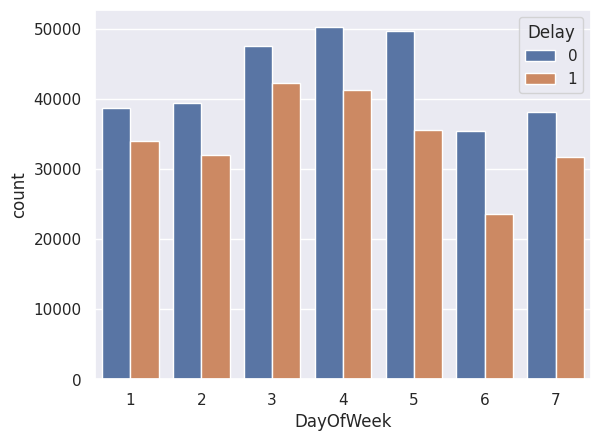

In [15]:
sns.countplot(data=df, x='DayOfWeek', hue='Delay')

In [16]:
#Thứ 3-4-5 là thứ có mật độ máy bay bị trễ nhất
#Thứ 6 không bị trễ

<Axes: xlabel='Airline', ylabel='count'>

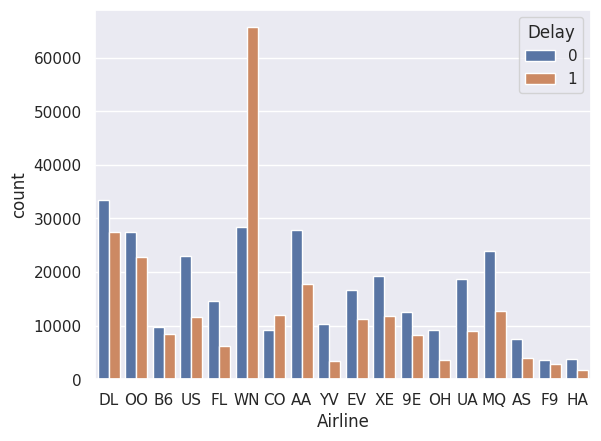

In [17]:
sns.countplot(data=df, x='Airline', hue='Delay')

WN Airline là hãng hàng không duy nhất thường xuyên bị chậm chuyến hơn các hãng hàng không khác.

<Axes: xlabel='Airline', ylabel='Length'>

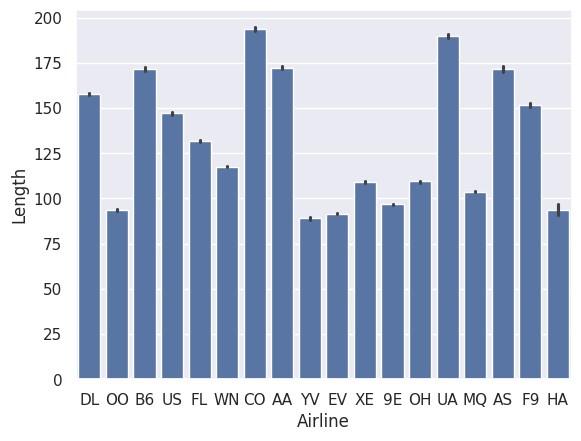

In [18]:
sns.barplot(data=df, x='Airline', y='Length')

CO & UA có thời gian bay trung bình dài nhất.

<Axes: xlabel='Airline', ylabel='Time'>

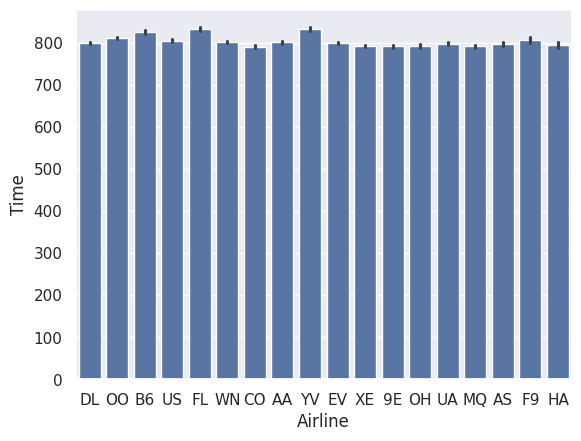

In [19]:
sns.barplot(data=df, x='Airline', y='Time')

Hầu như tất cả các hãng hàng không đều có giờ khởi hành giống nhau

2.XỬ LÝ DỮ LIỆU

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Chọn các cột cần chuyển đổi
columns_to_encode = ['Airline', 'AirportFrom', 'AirportTo']

# Fit và transform từng cột object
for column_to_encode in columns_to_encode:
    df[column_to_encode] = label_encoder.fit_transform(df[column_to_encode])

# Hiển thị dữ liệu sau khi xử lý
print(df.head())

   Flight    Time  Length  Airline  AirportFrom  AirportTo  DayOfWeek  Delay
0  2313.0  1296.0   141.0        5           16        129          1      0
1  6948.0   360.0   146.0       12           65        208          4      0
2  1247.0  1170.0   143.0        3           35         60          3      0
3    31.0  1410.0   344.0       14          203        217          6      0
4   563.0   692.0    98.0        8           32         16          4      0


In [21]:
# Removing flight ID

df = df.drop('Flight', axis=1)
df.head()

,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Delay
0,1296.0,141.0,5,16,129,1,0
1,360.0,146.0,12,65,208,4,0
2,1170.0,143.0,3,35,60,3,0
3,1410.0,344.0,14,203,217,6,0
4,692.0,98.0,8,32,16,4,0


<Axes: xlabel='Delay', ylabel='count'>

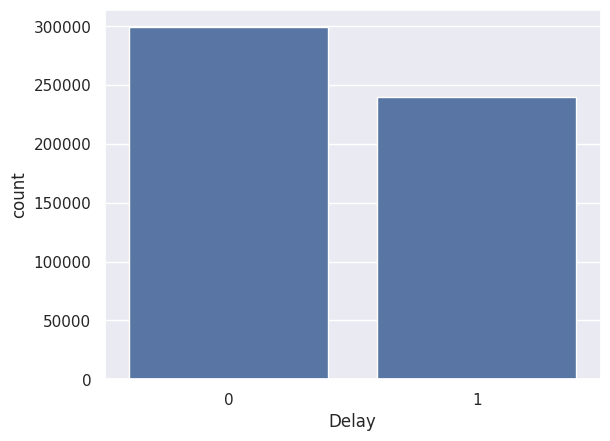

In [22]:
sns.countplot(x=df["Delay"])

In [23]:
df['Delay'].value_counts()

0    299115
1    240263
Name: Delay, dtype: int64

In [24]:
from sklearn.utils import resample

# creatating two different dataframe of majority and minority class

df_majority = df[(df['Delay']==0)]
df_minority = df[(df['Delay']==1)]

# upsample minority class

df_minority_unsampled = resample(df_minority,
                                 replace=True,   # sample with replacement
                                 n_samples= 299115, # to match majority class
                                 random_state=0) # reproducible result

#Combine majority class with upsampled minority class

df_upsampled = pd.concat([df_minority_unsampled, df_majority])

In [25]:
df_upsampled['Delay'].value_counts()

1    299115
0    299115
Name: Delay, dtype: int64

<Axes: xlabel='Delay', ylabel='count'>

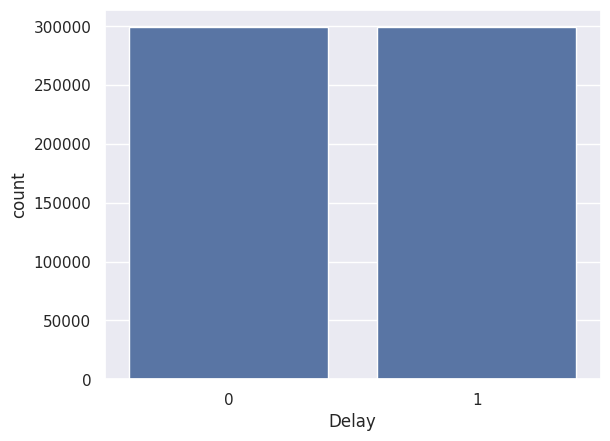

In [26]:
sns.countplot(x=df_upsampled["Delay"])

In [27]:
import scipy.stats as stats
z = np.abs(stats.zscore(df_upsampled))
data_clean = df_upsampled[(z<3).all(axis=1)]
data_clean.shape

(587280, 7)

<Axes: >

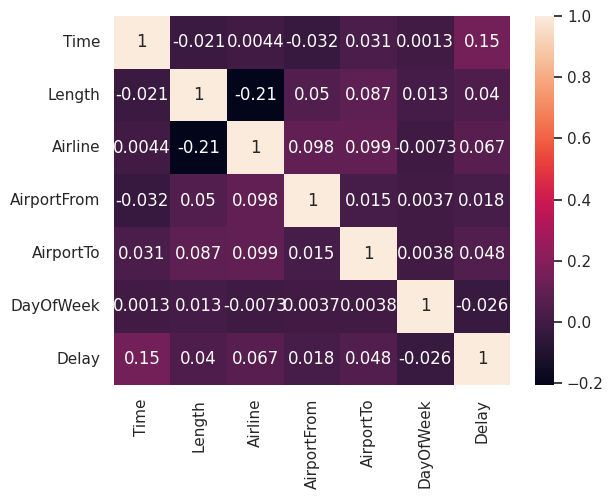

In [28]:
sns.heatmap(df.corr(), annot=True)

In [29]:
# # plotting correlation heatmap
# dataplot = sns.heatmap(data_clean.corr(), cmap="YlGnBu", annot=True)

# # displaying heatmap
# plt.show()

3. TẬP HUẤN DỮ LIỆU

In [30]:
X = data_clean.drop('Delay', axis=1)
y = data_clean['Delay']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

DECISIONTREE

In [32]:
# Initialize the Decision Tree classifier
#dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth=3)
# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.6100922898787631


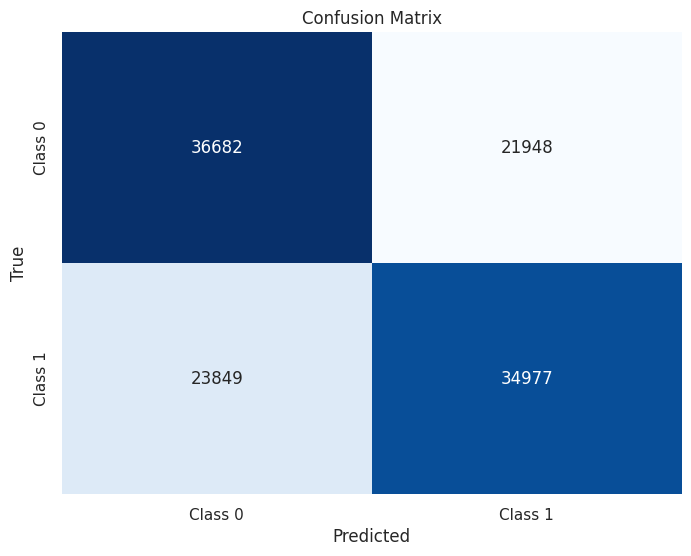

In [33]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

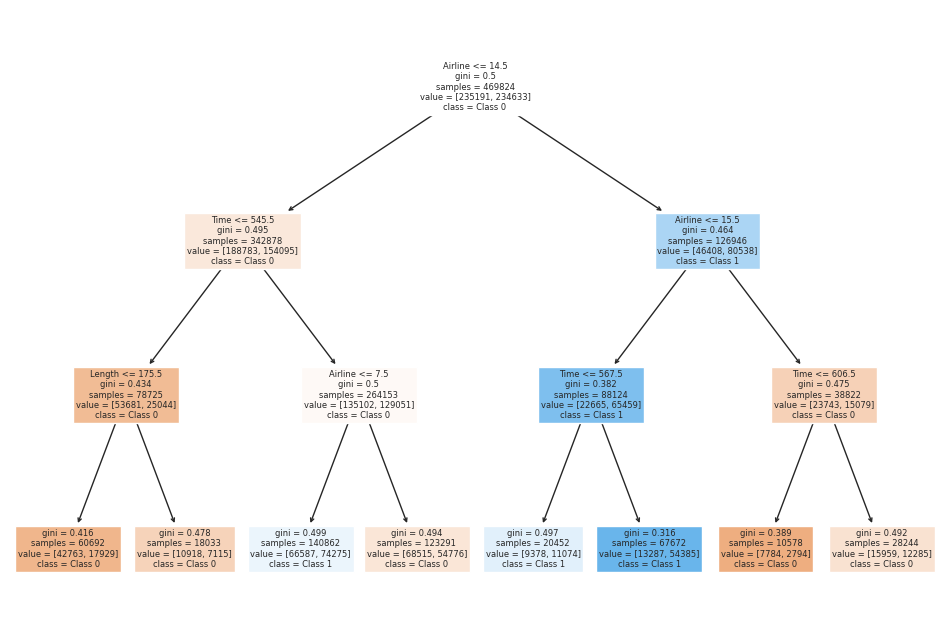

In [34]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"])
plt.show()

In [44]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(10, 40)

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 10: Test Score = 0.639277686963629
Max Depth = 11: Test Score = 0.64312593652091
Max Depth = 12: Test Score = 0.6466166053671162
Max Depth = 13: Test Score = 0.649664555237706
Max Depth = 14: Test Score = 0.6541087726467784
Max Depth = 15: Test Score = 0.6558541070698815
Max Depth = 16: Test Score = 0.6594554556599919
Max Depth = 17: Test Score = 0.661362552785724
Max Depth = 18: Test Score = 0.665738659583163
Max Depth = 19: Test Score = 0.6682842936929574
Max Depth = 20: Test Score = 0.6716642827952595
Max Depth = 21: Test Score = 0.673375561912546
Max Depth = 22: Test Score = 0.6742609998637787
Max Depth = 23: Test Score = 0.677487740089906
Max Depth = 24: Test Score = 0.6786115651818553
Max Depth = 25: Test Score = 0.6796843073150797
Max Depth = 26: Test Score = 0.6806889388366707
Max Depth = 27: Test Score = 0.6812082822503747
Max Depth = 28: Test Score = 0.6822384552513282
Max Depth = 29: Test Score = 0.6820341234164283
Max Depth = 30: Test Score = 0.6820766925486991


In [36]:
# Initialize the Decision Tree classifier
#dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42,max_depth=37)
# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

Decision Tree Accuracy: 0.6827322571856695


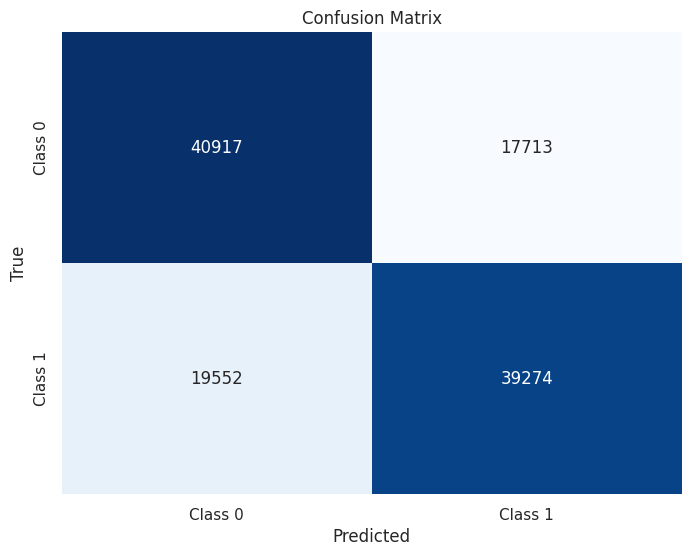

In [37]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

RANDOMFOREST

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = pd.get_dummies(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập dữ liệu huấn luyện
rf.fit(X_train, y_train)

# Dự đoán nhãn cho tập dữ liệu test
y_pred = rf.predict(X_test)

# Đánh giá độ chính xác và hiển thị báo cáo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7008071107478545


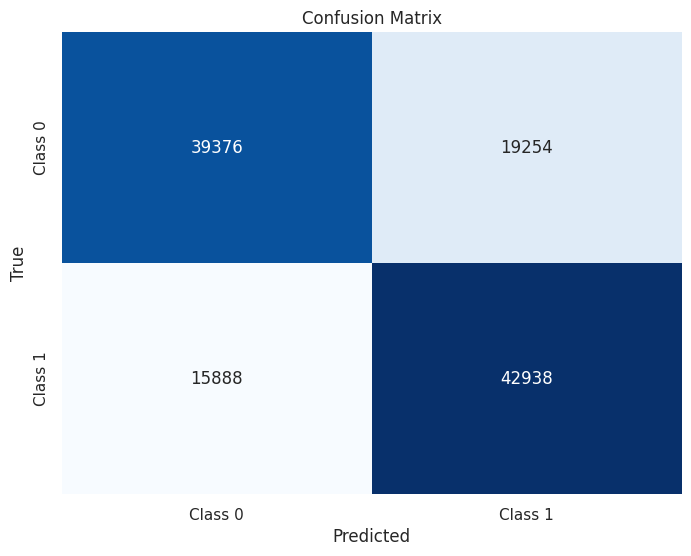

In [39]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NAVIE BAYES

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Naive Bayes
model = GaussianNB()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
# Đánh giá hiệu suất
accuracy = accuracy_score(y_test, y_pred)
# In kết quả
print(f'Accuracy: {accuracy}')

Accuracy: 0.5802938972891977


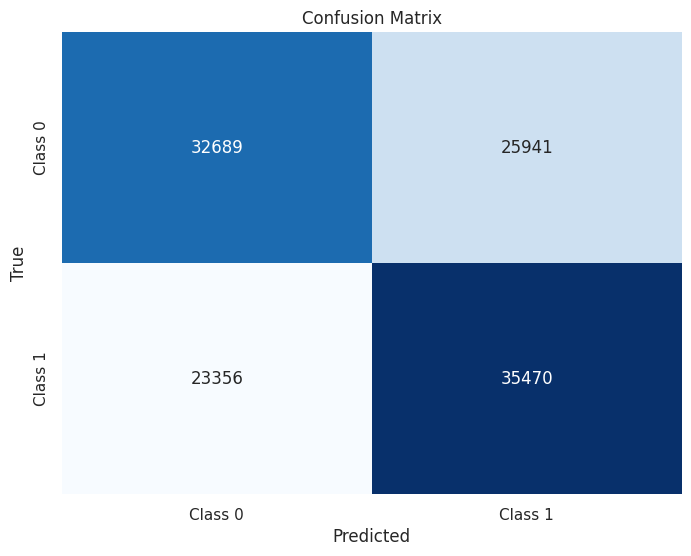

In [41]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

LOGISTICREGRESTSSION

In [42]:
# Tạo và huấn luyện mô hình Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)
# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f'Độ chính xác: {accuracy}')

Độ chính xác: 0.5783442310311947


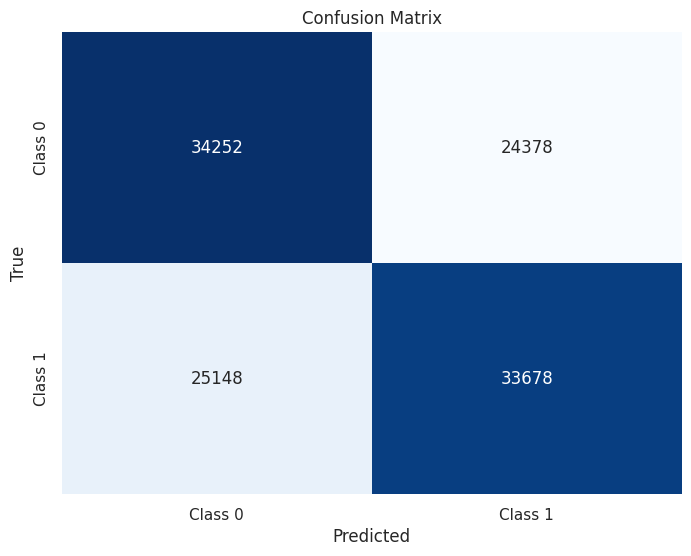

In [43]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

4. KẾT LUẬN

- Thuật toán DecisionTree chưa được turning maxdepth có độ chính xác là: 61%
- Thuật toán DecisionTree đã được turning maxdepth có độ chính xác là: 69%
- Thuật toán RandoomForest có độ chính xác là: 70%
- Thuật toán NavieBayes có độ chính xác là:  58%
- Thuật toán Logisticregrestssion có độ chính xác la: 58%